In [1]:
#Se puede usar la función export_graphviz de Scikit-learn para mostrar el árbol dentro de un cuaderno Jupyter. Para ello hay que instalar graphviz y pydotplus.
#pip install graphviz
#pip install pydotplus
#Instalar el software Graphviz: https://www.graphviz.org/download/
#Para resolver los problemas con Graphviz: https://stackoverflow.com/questions/33433274/anaconda-graphviz-cant-import-after-installation
#conda install python-graphviz

import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Importar Decision Tree Classifier
from sklearn.model_selection import train_test_split # Importar train_test_split
from sklearn import metrics #Importar scikit-learn metrics para el cálculo de la precisión

In [2]:
nombresDeColumnas = ['izquierda', 'derecha', 'frontal', 'trasero', 'avance']
#Cargar el dataset. 
#El fichero contiene medidas de sensores de un robot (un valor cercano a 0 indica que hay cerca un obstáculo, y un valor mayor que 1 indica que el obstáculo está lejos)
#la columna 'avance' indica el sentido del movimiento en base a las medidas de los sensores: 
#Es decir, 'avance' puede tomar 5 valores: stop=0, moverse hacia la izquierda=1, moverse hacia la derecha=2, moverse hacia delante=3, moverse hacia detrás=4
sensores = pd.read_csv("sensores.csv", header=None, names=nombresDeColumnas)
sensores.head()

,izquierda,derecha,frontal,trasero,avance
0,0.1,0.2,0.1,0.3,0
1,0.3,0.1,0.4,0.1,0
2,0.2,0.3,0.1,0.2,0
3,0.4,0.4,0.2,0.4,0
4,0.3,0.3,0.3,0.3,0


In [3]:
#Dataset dividido en características y variable objetivo (target)
columnasDeCaracteristicas = ['izquierda', 'derecha', 'frontal', 'trasero', 'avance']
X = sensores[columnasDeCaracteristicas] # características
y = sensores.avance # variable objetivo (target)

In [4]:
#Trocear el dataset en datos de entrenamiento y de test
#95% para entrenamiento y 5% para test (esto es una exageración, pero dado que el fichero de entrenamiento es muy pequeño)
#había que aprovechar el mayor número de datos como patrones de entrenamiento
X_entrenamiento, X_test, y_entrenamiento, y_test = train_test_split(X, y, test_size=0.05, random_state=1) 

In [5]:
# Para más información sobre los parámetros de DecisionTreeClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# Crear el objeto DecisionTreeClassifier
clf = DecisionTreeClassifier()

#Probad con otros posibles parámetros
#clf = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)

#Entrenar el objeto DecisionTreeClassifier
clf = clf.fit(X_entrenamiento,y_entrenamiento)

#Predecir la respuesta para el dataset de test
y_pred = clf.predict(X_test)

In [6]:
#Cálculo de la precisión del modelo obtenido comprarando los resultados predichos con los que debería dar para los valores de test
print("Precisión:",metrics.accuracy_score(y_test, y_pred))

Precisión: 1.0


In [7]:
print ("'izquierda', 'derecha', 'frontal', 'trasero', 'avance")
print (clf.predict([[0.1,0.1,0.1,0.3,0]]))
print ("'stop=0','izq=1','der=2','del=3','det=4'")

'izquierda', 'derecha', 'frontal', 'trasero', 'avance
[0]
'stop=0','izq=1','der=2','del=3','det=4'


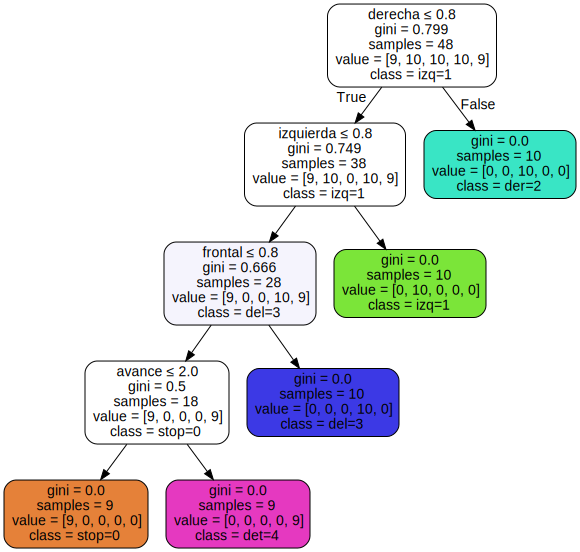

In [8]:
import graphviz
from sklearn import tree
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

data = tree.export_graphviz(clf,out_file=None,feature_names = columnasDeCaracteristicas,class_names=['stop=0','izq=1','der=2','del=3','det=4'],   
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(data)
graph

#El valor "value" en cada cuadro indica cuántas muestras de ese nodo caen en cada categoría